# Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import pyopia.statistics
import matplotlib.pyplot as plt
from matplotlib import colors
import cmocean
import numpy as np

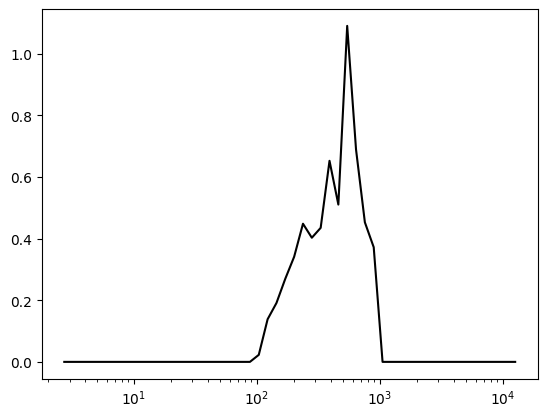

In [7]:
filename = 'proc/test-STATS.h5'
pixel_size = 28
path_length = 40

stats = pd.read_hdf(filename, 'ParticleStats/stats')

dias, vd = pyopia.statistics.vd_from_stats(stats, pixel_size)
plt.plot(dias, vd ,'k')
plt.xscale('log')

In [4]:
timeseries = pyopia.statistics.make_timeseries_vd(stats, pixel_size, path_length)

100%|██████████| 20/20 [00:00<00:00, 733.75it/s]


Text(0.5, 1.0, 'Time-series volume distribution')

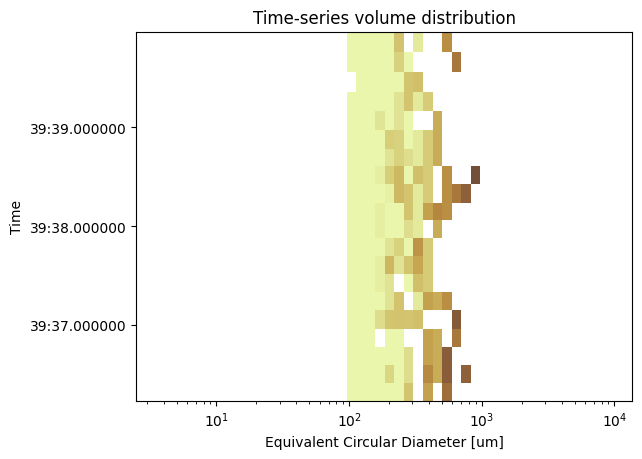

In [9]:
dias = timeseries.iloc[:,0:52].columns.values.astype(float)
vdts = timeseries.iloc[:,0:52].values

#f = plt.figure(figsize=(8,8))
pcm = plt.pcolormesh(dias, timeseries['Time'], vdts,
                     cmap=cmocean.cm.turbid, norm=colors.LogNorm(vmin=0.1, vmax=10))
#c=f.colorbar(pcm, ax=plt.gca())
plt.xscale('log')
#plt.gca().invert_yaxis()
plt.xlabel('Equivalent Circular Diameter [um]')
plt.ylabel('Time')
#c.set_label('Volume Distribution [uL/L/size-class]')
plt.title('Time-series volume distribution')